# Evaluating topic coherence

Typical approach to evaluating topic coherence measures involve human ratings of LDA topics. 
Dataset modeled is often generic enough to for raters from Amazon mechanical Turk to be familiar with the vocabulary and ideas (News, Wikipedia, etc) </br>
[Newman, Lau. Automatic Evaluation of topic coherence](https://dl.acm.org/citation.cfm?id=1858011) </br>
Not too complicated to decide on a coherence measure with this approach -- retrieve a coherence score using various metrics and see which correlates best with human ratings:

In [1]:
import os
from gensim.corpora import Dictionary
from process_topics import show_topic_words, run_all, coherence_widget, NewCoherence, coherence_scores
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from IPython.display import Image


### Movie corpus used by Rosner et al
#### Small sample taken

In [2]:
plots = []
with open('../data/movieplotsawk') as f:
    plots =f.readlines()
print len(plots)
plots = [i.split() for i in plots[:2000]]
dictionarymovie = Dictionary(plots)
corpusmovie = [dictionarymovie.doc2bow(text) for text in plots]

7396


In [3]:
tf_vectorizer = CountVectorizer()
tftexts = [' '.join(text) for text in plots]
tf = tf_vectorizer.fit_transform(tftexts)
print tf.shape

(2000, 45348)


### Cooccurrence matrix created for indirect measures (Cosine only for now)

In [4]:
tf[tf>1]=1
xc = (tf.T * tf)
print xc.shape
cooccur =xc.todense()

(45348, 45348)


### Prepare sample topic file

In [5]:
tmfile =open('../data/topicsMovie.txt')
topicsmovie = [i.rstrip('\n').split() for i in tmfile.readlines()]

### Get coherence scores across all measures 

In [6]:

what= coherence_scores(coherence='all', corpus= corpusmovie, 
                       dictionary =dictionarymovie, topics= topicsmovie,
                      cooccur=cooccur, tf_vectorizer=tf_vectorizer)

### Plot correlation of human ratings to our measures
##### Low association expected: Very small sample of corpus taken for initial analysis

,ratings,association,chisquare,cosine,dice,gmean,inclusion,jaccard,joint_prob,log_cond,npmi,pmi,zscore
ratings,1.000000,0.104856,0.271649,0.077035,0.174353,0.149452,0.025181,0.154189,-0.048312,0.162977,0.394347,0.333149,0.326754
association,0.104856,1.000000,0.890649,0.421696,0.963318,0.975624,0.835460,0.982594,0.868321,0.694317,0.547868,-0.145954,0.778521
chisquare,0.271649,0.890649,1.000000,0.325584,0.904901,0.900899,0.705715,0.907936,0.577559,0.658062,0.843014,0.260179,0.975342
cosine,0.077035,0.421696,0.325584,1.000000,0.528133,0.501829,0.295276,0.498475,0.469139,0.634055,0.226075,-0.419412,0.307229
dice,0.174353,0.963318,0.904901,0.528133,1.000000,0.989187,0.754149,0.995068,0.824119,0.757795,0.588894,-0.124852,0.819096
gmean,0.149452,0.975624,0.900899,0.501829,0.989187,1.000000,0.841233,0.987547,0.852768,0.767629,0.561525,-0.151850,0.802341
inclusion,0.025181,0.835460,0.705715,0.295276,0.754149,0.841233,1.000000,0.769362,0.799736,0.639229,0.344827,-0.230223,0.575821
jaccard,0.154189,0.982594,0.907936,0.498475,0.995068,0.987547,0.769362,1.000000,0.838974,0.731872,0.586970,-0.126838,0.814698
joint_prob,-0.048312,0.868321,0.577559,0.469139,0.824119,0.852768,0.799736,0.838974,1.000000,0.630108,0.128395,-0.515195,0.395661
log_cond,0.162977,0.694317,0.658062,0.634055,0.757795,0.767629,0.639229,0.731872,0.630108,1.000000,0.448468,-0.168961,0.609885


,ratings,association,chisquare,cosine,dice,gmean,inclusion,jaccard,joint_prob,log_cond,npmi,pmi,zscore
81,0.000,0.101325,0.165021,0.945761,0.125728,0.290030,0.500809,0.152772,5.830833,-1.092801,0.202499,8.240514,5.631792
88,0.125,0.042274,0.114684,0.934953,0.091744,0.192617,0.254856,0.102882,1.803333,-1.524660,0.183474,8.319635,4.496835
18,0.125,0.089646,0.137710,0.939695,0.120040,0.268058,0.433059,0.143417,5.415000,-1.447242,0.161125,8.076285,4.645044
8,0.125,0.049649,0.120373,0.940076,0.094331,0.216623,0.367223,0.104935,2.600000,-1.108499,0.180409,8.286233,4.525039
28,0.125,0.020412,0.069841,0.866966,0.045475,0.121472,0.283927,0.048893,1.029167,-2.323033,0.145477,8.310444,2.479632
6,0.250,0.042796,0.121379,0.947457,0.094966,0.202675,0.283667,0.105467,1.988333,-1.382141,0.196043,8.375411,4.737113
29,0.250,0.126341,0.185110,0.967321,0.157459,0.343139,0.510138,0.191885,7.589167,-1.192758,0.205069,8.156767,6.239527
43,0.250,0.057415,0.172913,0.925920,0.102777,0.222928,0.326394,0.117799,1.596667,-1.203098,0.291308,8.813611,6.932575
80,0.250,0.057202,0.137511,0.928057,0.086545,0.219016,0.465383,0.097596,2.906667,-1.863730,0.205634,8.409972,4.931146
34,0.375,0.115469,0.190350,0.967055,0.155897,0.332416,0.463591,0.186724,6.405833,-1.074172,0.219451,8.219876,6.681153


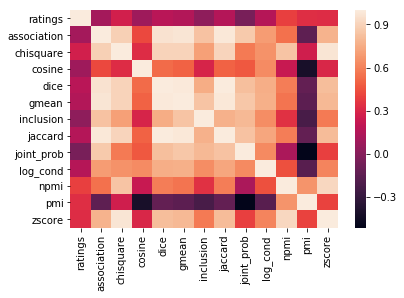

In [59]:
import matplotlib
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

tmgold = open('../data/goldMovie.txt')
ratingsmovie = [float(i.rstrip('\n')) for i in tmgold.readlines()]
ratingsdict = {"ratings": ratingsmovie}
ratingsdf = pd.DataFrame(ratingsdict)
randc =pd.concat([ratingsdf,pd.DataFrame(what)], axis =1)

display(randc.corr())

display(randc.sort_values('ratings'))

# plot heatmap
ax = sns.heatmap(randc.corr().T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=100)
plt.show()  # NUMPY ISSUE CAN PLT SHOW RN

### A few issues with this:
##### A) Domain/Rater mismatch
    Find raters who know a (smaller) corpus fully
    Can be students preparing for a final exam (law, science)
        Or who know a book or series front to back (Harry Potter, Bible)
##### B) Loss of judgment information
    Why was a topic rated low/high
    Resolving A) provides better ratings
    But an improved rating set up as well:
        Topic terms are read one at a time, so why not capture
        what is being rated with the same granularity

|Topics | ratings|
|---|---|
|week top winner competition judge |0.5|
|tamil khan hindi kumar telugu |0.625|
|monster dragon robot toy giant |0.75|
|smith jones miller moore adams |0.75|
|team league football game sport |1|
|actor actress drama role television| 1|
|line color side bar ball |0.25|
|image use article copyright summary| 0.5|
|world south australia gold silver |0.125|
|picture hollywood motion studio screen| 1|
|time people thing way life |0.375|
|york city chicago time manhattan| 0.5|
|agent bond mission attack bomb |1|
|edition dvd christmas volume release| 0.625|
|government war state country union |0.875|
|band rock guitar drum bass |1|
|series television pilot minisery drama| 0.625|
|october march november december february| 1|
|country date place http year| 0.125|
|island ship sea beach boat| 1|


##### C) Model type
    Can the incoherence pattern be reproduced in FA/NNMF

#### Factor Analysis, with varimax rotation
##### The result of varimax rotation (onto a simple structure) can only happen in LDA with a low beta parameter. 
##### Should we rely on topic coherence ratings for very different incoherence patterns?

The ideal simple structure is such that:

-each item has a high, or meaningful, loading on one factor only and

-each factor have high, or meaningful, loadings for only some of the items.

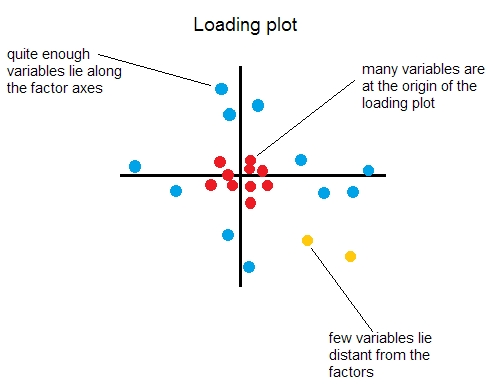

In [9]:
Image(filename='../data/JGplo.jpg') 

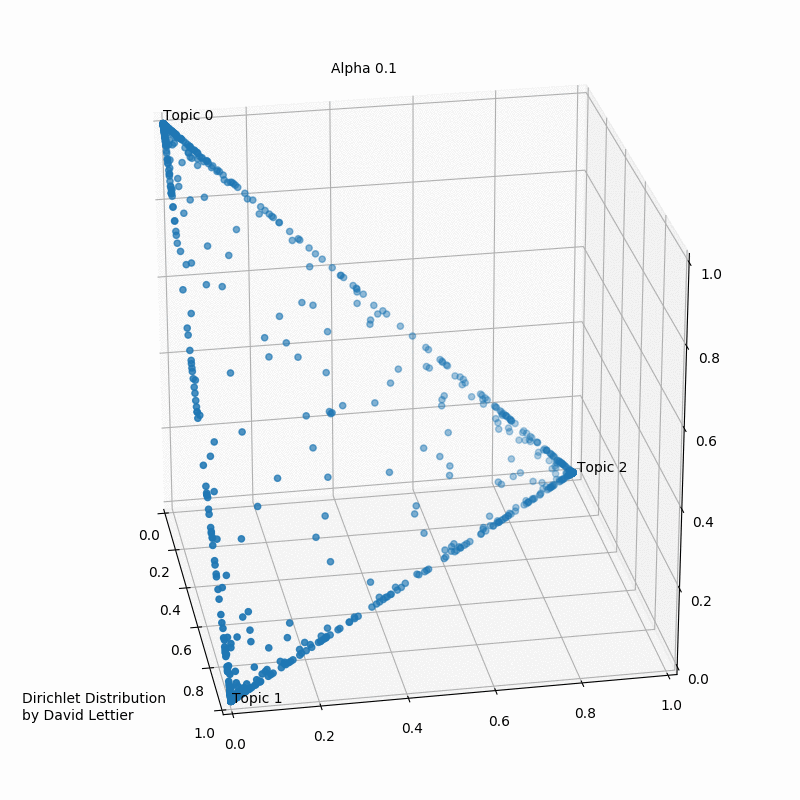

In [10]:
Image(filename='../data/lda.gif.png') 

In [8]:
%load_ext autoreload
%autoreload 2
import logging
import warnings
import numpy as np
import pandas as pd
import io
from process_topics import show_topic_words, run_all, coherence_widget, NewCoherence, coherence_scores
from gensim.models import CoherenceModel, LdaModel, HdpModel, nmf, LdaMulticore
from gensim.corpora import Dictionary, csvcorpus
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import *
from time import time
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual, fixed, interactive_output, FloatSlider
import ipywidgets as widgets
import qgrid
import logging

#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### Set up corpus

#### Set up test corpus, should be tokenized, sotpwords removed

In [9]:
%%time

elections = io.open('../data/Election2008Paragraphes.txt',encoding = "ISO-8859-1")
electionlines  =elections.readlines()

CUSTOM_FILTERS = [lambda x: x.lower(),  strip_punctuation, strip_multiple_whitespaces, strip_numeric,remove_stopwords, strip_short]

texts = [preprocess_string(line, filters=CUSTOM_FILTERS) for line in electionlines]


dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tf_vectorizer = CountVectorizer()
tftexts = [' '.join(text) for text in texts]
tf = tf_vectorizer.fit_transform(tftexts)
tf[tf>1]=1
xc = (tf.T * tf)
print xc.shape
cooccur =xc.todense()

data = [texts, dictionary, corpus, tf_vectorizer, tf, cooccur]


(15494, 15494)
Wall time: 4.1 s


In [10]:
#changes made to FARotate in the code will require kernel restart if reloading this cell!
m = coherence_widget(data)
display(m)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KFJhZGlvQnV0dG9ucyhkZXNjcmlwdGlvbj11J0Nob29zZSBNb2RlbCcsIGxheW91dD1MYXlvdXQod2lkdGg9dScyNTBweCcpLCBvcHRpb25zPSgnTk1GJyzigKY=


In [69]:
topics, coherences, both= m.result

In [70]:
freqs = tf.toarray().sum(axis=0)


[u'world nuclear america people states country like global weapons government']
1072 249 1623 1640 612 1176 806 318 159 806 
[u'country america government need people help time world new security']
1176 1623 806 1230 1640 594 1079 1072 1245 540 
[u'time know years world states jobs country american new said']
1079 1045 901 1072 612 534 1176 1329 1245 443 
[u'president new tax years america bush war need families going']
1368 1245 471 901 1623 461 800 1230 540 595 
[u'care health energy insurance think plan american need people new']
746 679 550 279 523 462 1329 1230 1640 1245 
[u'people american need war time americans new america washington country']
1640 1329 1230 800 1079 851 1245 1623 514 1176 
[u'oil energy tax need president people believe america time americans']
373 550 471 1230 1368 1640 685 1623 1079 851 
[u'world america country know people security need american like god']
1072 1623 1176 1045 1640 540 1230 1329 806 152 
[u'people new jobs care economy health america govern

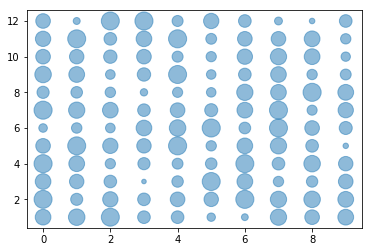

In [71]:
freqbubbles = []
for topic in topics:
    print ''
    print topic.values()
    for term in topic.values()[0].split():
        print freqs[tf_vectorizer.vocabulary_[term]],
        
        freqbubbles.append(freqs[tf_vectorizer.vocabulary_[term]])
    #for term infreqs[tf_vectorizer.vocabulary_[]]

x= range(10)*len(topics)
y = [item  for item in range(len(topics),0,-1) for i in range(10)]
z = [f/5 for f in freqbubbles]
print len(x), len(y)
plt.scatter(x, y, z, alpha=0.5)
plt.show()


In [31]:
print [item for item in range(len(topics),0,-1) for i in range(10)]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
from __future__ import division
from process_topics import coherence_scores
from similarity import *
style = {'width': '1000px', 'height': '30px'}

w=IntSlider(10,0,1000, description = 'w',layout=style)
w2=IntSlider(10,0,1000, description = 'w2',layout=style) 
co=IntSlider(10,0,1000, description = 'co',layout=style)
ndocs=IntSlider(1000,0,10000, description = 'ndocs',layout=style)
print co.value
exp = FloatSlider(value=0.0, min=0, max=20, description='exp', layout=style)
joint = FloatSlider(value=0.0, min=0, max=20, description='exp', layout=style)

exp.style.handle_color= 'yellow'
#print widgets.__dict__
ui = widgets.VBox([w, w2, co, ndocs,exp])

dummycoprofiles = [[0,1]],[[0,1]]    
def similarities(w,w2,co,ndocs, held=[]):
    scores = calculate_sims(w,w2,co,dummycoprofiles,ndocs,'all')
    #held.append(w)
    display(pd.DataFrame(scores))
    return scores

out =interactive_output(similarities,
         {'w':w,'w2':w2,'co':co,'ndocs':ndocs})

out.layout.height= '500px'
display(ui,out)

@out.capture()
def set_exp_per_rest(change):
    exp.value = ((w.value+ w2.value)/ ndocs.value) *100
    
w.observe(set_exp_per_rest, names="value")
w2.observe(set_exp_per_rest, names="value")
co.observe(set_exp_per_rest, names="value")
ndocs.observe(set_exp_per_rest, names="value")


    

10


VkJveChjaGlsZHJlbj0oSW50U2xpZGVyKHZhbHVlPTEwLCBkZXNjcmlwdGlvbj11J3cnLCBsYXlvdXQ9TGF5b3V0KGhlaWdodD11JzMwcHgnLCB3aWR0aD11JzEwMDBweCcpLCBtYXg9MTAwMCnigKY=


Output(layout=Layout(height=u'500px'))

In [ ]:
import os

plots = []
with open('../data/movieplotsawk') as f:
    plots =f.readlines()


plots = [i.split() for i in plots]
dictionarymovie = Dictionary(plots)
corpusmovie = [dictionarymovie.doc2bow(text) for text in plots]

dictionarymovie.token2id['strip']


In [ ]:

tmfile =open('../data/topicsMovie.txt')
topicsmovie = [i.rstrip('\n').split() for i in tmfile.readlines()]


#moviecoherence = coherence_scores(coherence='all', corpus= corpusmovie, dictionary =dictionarymovie, topics= topicsmovie)
what= coherence_scores(coherence='all', corpus= corpusmovie, dictionary =dictionarymovie, topics= topicsmovie)



tmgold = open('../data/goldMovie.txt')
ratingsmovie = [float(i.rstrip('\n')) for i in tmgold.readlines()]
ratingsdict = {"ratings": ratingsmovie}
ratingsdf = pd.DataFrame(ratingsdict)
ratingsandcoherence =pd.concat([ratingsdf,pd.DataFrame(what)], axis =1)

display(ratingsandcoherence.sort_values('ratings'))

In [ ]:
display(pd.DataFrame(what))